<a href="https://colab.research.google.com/github/cyotcoski/IS_6651J3_Project_2/blob/main/Castellano_Andres_MLP_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/Shareddrives/IS665\ Group4

/content/gdrive/Shareddrives/IS665 Group4


In [ ]:
!ls

 Andres_calculated_field.png		  FloodData-Priya2.twb
 Andres_Dashboards.twbx			 'FloodData-Priya .twb'
 bank-full2.csv				  Flood_Data.twb
 CalculatedField-Priya.png		  Group_4_FloodData.twb
'Calculated Fields - Doug.rtf'		  Parameter1-Priya.png
 Castellano_Andres_MLP_Classifier.ipynb   Parameter2-Priya.png
 Flood_Data_Doug.twb


In [ ]:
bank_data = pd.read_csv('bank-full2.csv')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
features = bank_data.columns.tolist()
features.remove('y')
features   

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [ ]:
encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(bank_data[features])
bank_data_encoded = pd.DataFrame(data_encoded, columns=features)
bank_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  float64
 2   marital    45211 non-null  float64
 3   education  45211 non-null  float64
 4   default    45211 non-null  float64
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  float64
 7   loan       45211 non-null  float64
 8   contact    45211 non-null  float64
 9   day        45211 non-null  float64
 10  month      45211 non-null  float64
 11  duration   45211 non-null  float64
 12  campaign   45211 non-null  float64
 13  pdays      45211 non-null  float64
 14  previous   45211 non-null  float64
 15  poutcome   45211 non-null  float64
dtypes: float64(16)
memory usage: 5.5 MB


In [ ]:
encoder = LabelEncoder()
target_encoded = encoder.fit_transform(bank_data['y'])
bank_data_encoded['class'] = target_encoded
encoder.inverse_transform(target_encoded)

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [ ]:
bank_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  float64
 2   marital    45211 non-null  float64
 3   education  45211 non-null  float64
 4   default    45211 non-null  float64
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  float64
 7   loan       45211 non-null  float64
 8   contact    45211 non-null  float64
 9   day        45211 non-null  float64
 10  month      45211 non-null  float64
 11  duration   45211 non-null  float64
 12  campaign   45211 non-null  float64
 13  pdays      45211 non-null  float64
 14  previous   45211 non-null  float64
 15  poutcome   45211 non-null  float64
 16  class      45211 non-null  int64  
dtypes: float64(16), int64(1)
memory usage: 5.9 MB


In [ ]:
bank_data_encoded.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,class
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22.936055,4.339762,1.167725,1.224813,0.018027,1963.307469,0.555838,0.160226,0.640242,14.806419,5.523014,255.338502,1.762381,40.154188,0.573356,2.559974,0.116985
std,10.618004,3.272657,0.608230,0.747997,0.133049,1463.533246,0.496878,0.366820,0.897951,8.322476,3.006911,239.660852,3.075904,96.917547,1.877700,0.989059,0.321406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,1.000000,1.000000,1.000000,0.000000,988.000000,0.000000,0.000000,0.000000,7.000000,3.000000,103.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,21.000000,4.000000,1.000000,1.000000,0.000000,1364.000000,1.000000,0.000000,0.000000,15.000000,6.000000,180.000000,1.000000,0.000000,0.000000,3.000000,0.000000
75%,30.000000,7.000000,2.000000,2.000000,0.000000,2344.000000,1.000000,0.000000,2.000000,20.000000,8.000000,319.000000,2.000000,0.000000,0.000000,3.000000,0.000000
max,76.000000,11.000000,2.000000,3.000000,1.000000,7167.000000,1.000000,1.000000,2.000000,30.000000,11.000000,1572.000000,47.000000,558.000000,40.000000,3.000000,1.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bank_data_encoded.drop('class', axis=1),
                                                    bank_data_encoded['class'],
                                                    test_size=0.3,
                                                    random_state=0,
                                                    stratify=bank_data_encoded['class'])

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
LAYERS = 1000
TOL = 1e-6
LEARNING_RATE = .1 

clf = MLPClassifier(random_state=1,
                    max_iter=1000,
                    hidden_layer_sizes=LAYERS,
                    activation='tanh',
                    learning_rate_init = LEARNING_RATE,
                    learning_rate='constant',
                    tol=TOL,
                    n_iter_no_change=10,
                    verbose=True).fit(X_train, y_train)

Iteration 1, loss = 0.94381677
Iteration 2, loss = 0.48490500
Iteration 3, loss = 0.65560919
Iteration 4, loss = 0.78896884
Iteration 5, loss = 0.78088967
Iteration 6, loss = 0.78426054
Iteration 7, loss = 0.71203208
Iteration 8, loss = 0.72478958
Iteration 9, loss = 0.75683160
Iteration 10, loss = 0.81218020
Iteration 11, loss = 0.83842410
Iteration 12, loss = 0.89500304
Iteration 13, loss = 0.86898406
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.


In [ ]:
clf.predict_proba(X_test[:1])

array([[9.99604745e-01, 3.95254750e-04]])

In [ ]:
clf.predict(X_test[:1])

array([0])

In [ ]:
clf.score(X_train, y_train)

0.846810124182387

In [ ]:
clf.score(X_test, y_test)
#del confusion_matrix

0.8341197286936007

In [ ]:
y_pred_mlp = clf.predict(X_test)
y_prob_pred_mlp = clf.predict_proba(X_test)
# how did our model perform?
count_misclassified = (y_test != y_pred_mlp).sum()
conf_mat = confusion_matrix(
        y_test, y_pred_mlp, labels = [1,0])

print("Hyperbolic Tangent Activated MultiLayer Perceptron")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred_mlp)
print('Accuracy: {:.2f}'.format(accuracy))
confsion_matrix = pd.DataFrame(conf_mat)
print('Confusion Matrix')
confsion_matrix

Hyperbolic Tangent Activated MultiLayer Perceptron
Misclassified samples: 2250
Accuracy: 0.83
Confusion Matrix


,0,1
0,954,633
1,1617,10360


In [ ]:
print("Recall score : ", recall_score(y_test, y_pred_mlp , average='micro'))
print("Precision score : ",precision_score(y_test, y_pred_mlp , average='micro'))
print("F1 score : ",f1_score(y_test, y_pred_mlp , average='micro'))

Recall score :  0.8341197286936007
Precision score :  0.8341197286936007
F1 score :  0.8341197286936007


In [ ]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     11977
           1       0.37      0.60      0.46      1587

    accuracy                           0.83     13564
   macro avg       0.66      0.73      0.68     13564
weighted avg       0.88      0.83      0.85     13564



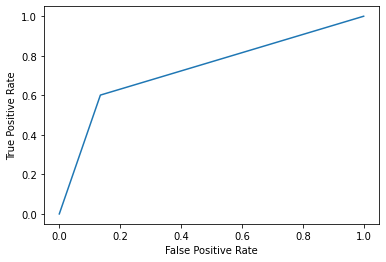

In [ ]:
##define metrics
y_pred_mlp = clf.predict(X_test)
fpr, tpr, _ = roc_curve(y_test,  y_pred_mlp)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.title(('\n').join(['Hidden Layers: ', str(LAYERS), 'Learning Rate: ', str(LEARNING_RATE),'Tolerance: ',str(TOL)]))
plt.show()